# Convolutional autoencoder for image denoising

**Author:** [Santiago L. Valdarrama](https://twitter.com/svpino)<br>
**Date created:** 2021/03/01<br>
**Last modified:** 2021/03/01<br>
**Description:** How to train a deep convolutional autoencoder for image denoising.

## Setup

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import mnist
from keras.models import Model

In [5]:

def preprocess(array):
    """Normalizes the supplied array and reshapes it to include 1 channel (grayscale)."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))  # Keep 1 channel (grayscale)
    return array

def colorize(array, labels):
    """Color the images: blue for even digits and red for odd digits."""
    colored_array = np.concatenate([array, array, array], axis=-1)  # Convert to 3 channels
    for i in range(len(array)):
        if labels[i] % 2 == 0:  # Even digit
            colored_array[i, :, :, 1:] = 0  # Remove red and green channel
        else:  # Odd digit
            colored_array[i, :, :, :2] = 0  # Remove green and blue channel
    return colored_array

In [6]:

def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


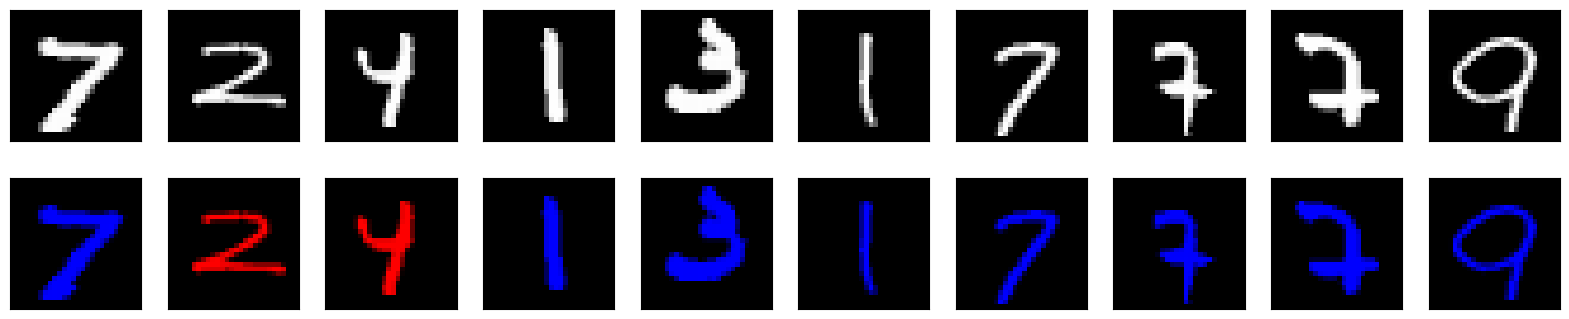

In [8]:

# Load data with labels
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Colorize the data based on the labels
train_data_colored = colorize(train_data, train_labels)
test_data_colored = colorize(test_data, test_labels)

# Display the original train data and the colored version
display(train_data, train_data_colored)


In [9]:

# Build the autoencoder
input = layers.Input(shape=(28, 28, 1))  # Input will be grayscale (1 channel)

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)  # Output will be RGB (3 channels)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 14, 14, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 28, 28, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,931 (113.01 KB)

 Trainable params: 28,931 (113.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.2173 - val_loss: 0.0737
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0687 - val_loss: 0.0627
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0612 - val_loss: 0.0584
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0570 - val_loss: 0.0553
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0547 - val_loss: 0.0525
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0525 - val_loss: 0.0510
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0510 - val_loss: 0.0496
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0493 - val_loss: 0.0483
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0486 - val_loss: 0.0478
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0475 - val_loss: 0.0465
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0466 - val_loss: 0.0469
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━

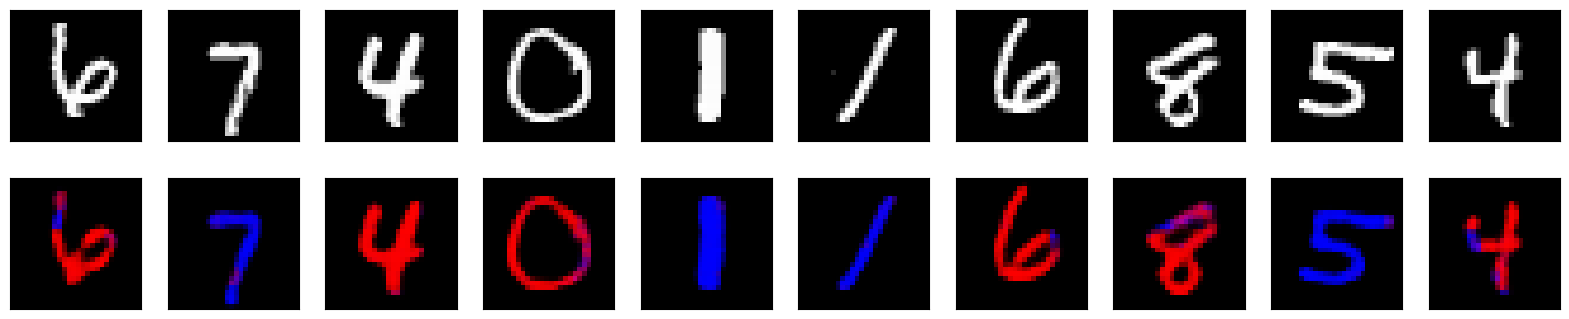

In [10]:

# Train the autoencoder using grayscale data as input and colored data as target
autoencoder.fit(
    x=train_data,
    y=train_data_colored,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data_colored),
)

# Let's now predict on the test data and display the results of our autoencoder
predictions = autoencoder.predict(test_data)
display(test_data, predictions)
